## Особенности вычислений Numpy

Во многих языках программирования для вычисления каких-либо значений в массиве (среднее арифметическое, максимум, минимум, поиск обратных значений и т.д.) применяются циклы. В numpy необходимости в циклах нет. 

In [1]:
import numpy as np               # Import numpy
import matplotlib.pyplot as plt  # Import plots
%matplotlib inline
np.__version__

'1.16.4'

Рассмотрим следующий пример.

Создадим функцию вычисления обратного числа, т.е. `y = 1 / x`. На входе - массив значений, на выходе - массив обратных чисел.
Реализуем эту функцию через циклы:

In [2]:
# Calculate 1 / x:
def calc_div(x):
    return [1.0 / i for i in x]

# Random array
np.random.seed(1)
darr = np.random.randint(1, 100, 500)

Подсчитаем время выполнения функии:

In [3]:
%timeit -n 10000 -r 5 calc_div(darr)

1.3 ms ± 6.82 µs per loop (mean ± std. dev. of 5 runs, 10000 loops each)


Проделаем эту же операцию упрощенным способом (numpy-style):

In [4]:
%timeit -n 10000 -r 5 (1.0 / darr)

4.06 µs ± 445 ns per loop (mean ± std. dev. of 5 runs, 10000 loops each)


Как видно, время вычисления по второму способу многократно меньше. Первый способ значительно медленнее в связи с тем, что при каждой итерации *Python* проверяет тип элемента массива и выбирает функцию, которая соответствует для данного типа оператора. Если тип каждого элемента был бы известен заранее, то таких накладных расходов не было.

Numpy позволяет избежать увеличения времени выполнения функции и накладных расходов на проверку типов. Такие операции называются в numpy векторизованными, т.к. применяются сразу ко всему вектору. 

Следующий пример вычисляет математическое ожидание двумя способами: через функцию и через метод `mean()`. Сравним время вычисления:

In [5]:
# Calculate average value:
def calc_mean(x):
    m = 0
    for i in x:
        m += i
    return m / len(x)

In [6]:
%timeit calc_mean(darr)

64.4 µs ± 150 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit darr.mean()

11.1 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Аналогично предыдущему примеру - вычисление среднего значения с помощью векторизованных вычислений в numpy - быстрее.

Numpy позволяет выполнять векторизованные вычисления между любым количеством массивов.
Пример: *сложить два вектора*: решим задачу через циклы и через векторизованые операции numpy.

In [8]:
def calc_add(x, y):
    s = np.zeros(len(x))
    for i in range(len(x)):
        s[i] = x[i] + y[i]
    return s

In [9]:
np.random.seed(1)
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)

Проверим, что реализованная функция и векторизованное вычисление numpy дают одинаковый результат:

In [10]:
(calc_add(x, y) == (x+y)).all()   # Check if ALL elements are TRUE

True

In [11]:
%timeit calc_add(x, y)

5.46 µs ± 76 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit (x+y)

469 ns ± 0.544 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Векторизованные вычисления также возможны и для многомерных массивов. Кроме того, можно указать ось, по которой выполняются вычисления (строка или столбец для двумерных массивов).

In [13]:
x = np.arange(8).reshape(2, 4)
2 ** x

array([[  1,   2,   4,   8],
       [ 16,  32,  64, 128]], dtype=int32)

Используя правила Broadcasting, можно применять векторизованные вычисления между многомерными массивами и одномерными, между многомерными массивами и числами, и т.д.
Например:

In [14]:
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [15]:
x + 10

array([[10, 11, 12, 13],
       [14, 15, 16, 17]])

In [16]:
y = np.arange(4)

In [17]:
x + y

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10]])

Вычисление функций по разным осям:

In [18]:
print(x)
x.mean(axis=0)

[[0 1 2 3]
 [4 5 6 7]]


array([2., 3., 4., 5.])

In [19]:
print(x)
x.mean(axis=1)

[[0 1 2 3]
 [4 5 6 7]]


array([1.5, 5.5])

Numpy содержит большое количество функций, которые поддерживают векторизованные операции. Тригонометрические, экспонента, логарифмы и т.д.

In [20]:
x = np.arange(1, 5)
print('cos^2(x) + sin^2(x) = ', np.cos(x) ** 2 + np.sin(x) ** 2)

cos^2(x) + sin^2(x) =  [1. 1. 1. 1.]


In [21]:
np.arctan(1 / 2 ** np.arange(5))

array([0.78539816, 0.46364761, 0.24497866, 0.12435499, 0.06241881])

In [22]:
print('e^x        =', np.exp(x))
print('e^x - 1    =', np.expm1(x))
print('ln(x)      =', np.log(x))
print('ln(1 + x)  =', np.log1p(x))
print('log2(x)    =', np.log2(x))
print('log10(x)   =', np.log2(x))

e^x        = [ 2.71828183  7.3890561  20.08553692 54.59815003]
e^x - 1    = [ 1.71828183  6.3890561  19.08553692 53.59815003]
ln(x)      = [0.         0.69314718 1.09861229 1.38629436]
ln(1 + x)  = [0.69314718 1.09861229 1.38629436 1.60943791]
log2(x)    = [0.        1.        1.5849625 2.       ]
log10(x)   = [0.        1.        1.5849625 2.       ]


### Агрегирующие функции

Numpy поддерживает агрегирующие функции - минимум, максимум, сумма, индекс минимального или максимального элемента, набор функций статистики (мат. ожидание, девиация, среднеквадратическое отклонение и т.д.)

In [23]:
np.random.seed(1)
x = np.random.normal(0, 10, 100000)

In [24]:
print('min:', np.min(x))
print('max:', np.max(x))
print('sum:', np.sum(x))

min: -43.26887280356832
max: 41.681176779550945
sum: 5253.028489682669


Индекс минимального и максимального значения:

In [25]:
print('argmin:', np.argmin(x), 'value:', x[np.argmin(x)])
print('argmax:', np.argmax(x), 'value:', x[np.argmax(x)])

argmin: 72386 value: -43.26887280356832
argmax: 14926 value: 41.681176779550945


Функции мат. статистики:

In [26]:
print('mean  : ', np.mean(x))
print('median: ', np.median(x))
print('std   : ', np.std(x))
print('var   : ', np.var(x))

mean  :  0.052530284896826686
median:  0.06000389061649444
std   :  9.983292735417361
var   :  99.66613384103707


### Агрегирование многомерных массивов

Как уже было сказано выше, применяя агрегирующую функцию к многомерному массиву, можно указать ось вычисления `axis`

In [27]:
np.random.seed(1)
x = np.random.randint(0, 10, size=(2, 5))
x

array([[5, 8, 9, 5, 0],
       [0, 1, 7, 6, 9]])

In [28]:
print('total sum  :', np.sum(x))
print('column sum :', np.sum(x, axis=0))
print('row sum    :', np.sum(x, axis=1))

total sum  : 50
column sum : [ 5  9 16 11  9]
row sum    : [27 23]


In [29]:
print('maximum    :', np.max(x))
print('column max :', np.max(x, axis=0))
print('row max    :', np.max(x, axis=1))

maximum    : 9
column max : [5 8 9 6 9]
row max    : [9 9]


### Список функций

|Функция            |   Без учета NaN     | Описание                      | 
|-------------------|---------------------|-------------------------------| 
| `np.min`          | `np.nanmin`         | Минимум                       | 
| `np.max`          | `np.nanmax`         | Максимум                      | 
| `np.argmin`       | `np.nanargmin`      | Индекс миниимального элемента | 
| `np.argmax`       | `np.nanargmax`      | Индекс максимального элемента | 
| `np.sum`          | `np.nansum`         | Сумма                         | 
| `np.prod`         | `np.nanprod`        | Произведение                  | 
| `np.mean`         | `np.nanmean`        | Среднее значение (смещение)   | 
| `np.median`       | `np.nanmedian`      | Медиана                       | 
| `np.std`          | `np.nanstd`         | Стандартное отклонение        | 
| `np.var`          | `np.nanvar`         | Дисперсия                     | 
| `np.percentile`   | `np.nanpercentile`  | Перцентиль                    | 


## Кумулятивные функции

Numpy поддерживает функции, которые вычисляют накапливающее значение, например аккумулятор и кумулирующее произведение. Эти функции применяются в разных задачах, например фильтрации сигналов.

In [30]:
x = np.arange(1, 5)
print('cumsum :', np.cumsum(x))
print('cumprod:', np.cumprod(x))

cumsum : [ 1  3  6 10]
cumprod: [ 1  2  6 24]


Вычисление экспоненты через ряд Тейлора: $\\sum_{k=0}^{10} \\frac{1}{k!}$

In [31]:
x = np.arange(1, 10)
1 + np.sum(1 / np.cumprod(x))

2.7182815255731922

Построение графика для аккумулятора случайных чисел:

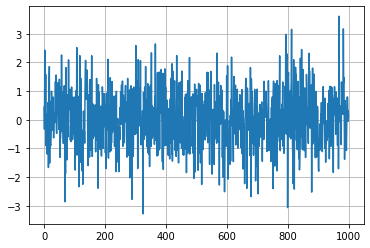

In [32]:
np.random.seed(5)
x = np.random.randn(1000)
y = np.cumsum(x)

plt.plot(x)
plt.grid()

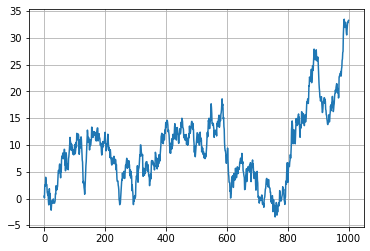

In [33]:
plt.plot(y)
plt.grid()